<a href="https://colab.research.google.com/github/salidego/Talento-Tech/blob/main/Analisis_de_Sentimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Sandra Delgado

In [1]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=656a9b2f65b48832d5bb2adbe252e7f7efad652d64eea058995a3d4ca2f2dbb9
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
 

In [25]:
#Importo Librerias
import pandas as pd
from textblob import TextBlob
from googletrans import Translator
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


In [11]:
#Funcion para traducir comentarios de ingles a español
def translateComment(strComment: str):
    translator = Translator()
    strEngComment = translator.translate(strComment, src="es", dest="en")
    return strEngComment.text

In [12]:
# Función para obtener la polaridad del comentario
def getPolarity(strComment: str):
    strComment = translateComment(strComment)  # Traducimos el comentario a inglés
    analysis = TextBlob(strComment)  # Analizamos el sentimiento usando TextBlob
    return analysis.sentiment.polarity  # Retornamos la polaridad del análisis

In [13]:
#Cargo el archivo de comentarios
df = pd.read_csv('/content/Comentarios.csv')

In [14]:
# Aplicamos la función getPolarity a la columna de comentarios y creamos una nueva columna 'polaridad'
df['polaridad'] = df['Comentario'].apply(getPolarity)

In [15]:
print(df)

                                           Comentario  polaridad
0   La comida fue excelente y el servicio fue exce...   0.555556
1   El ambiente era agradable y la comida estaba d...   0.261458
2   La comida estaba bien, pero el servicio fue le...   0.200000
3   No me gustó la comida, estaba fría y el sabor ...  -0.475000
4   El peor restaurante en el que he estado. No lo...  -1.000000
..                                                ...        ...
66  Siempre disfruto venir aquí. La comida es deli...   0.629167
67  Buen lugar para cenar, aunque el servicio pued...   0.070833
68  La comida está bien, pero el ambiente no es mu...   0.208974
69  No me gustó la comida y el servicio fue muy de...  -0.520000
70  Terrible experiencia. No recomendaría este lug...  -1.000000

[71 rows x 2 columns]


In [19]:
df.shape

(71, 2)

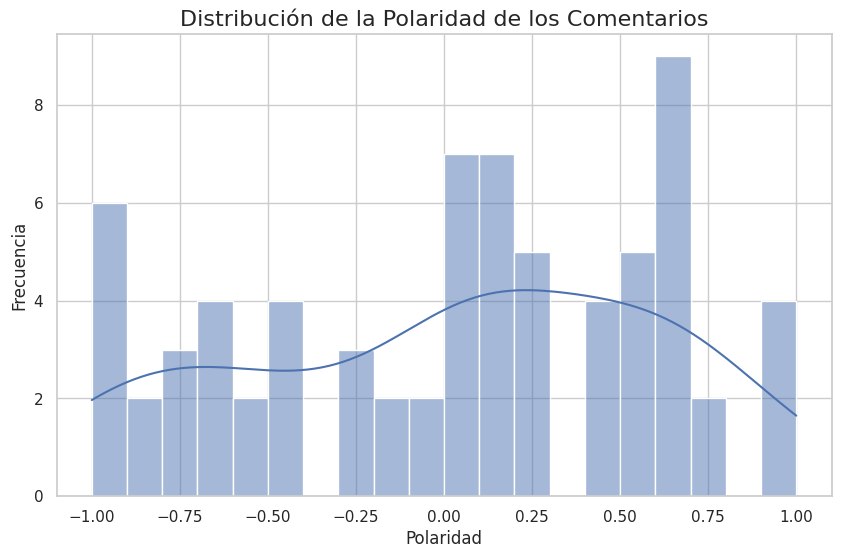

In [18]:
sns.set(style="whitegrid") #estilo

# Crear un histograma para la distribución de la polaridad
plt.figure(figsize=(10,6))
sns.histplot(df['polaridad'], bins=20, kde=True)

# Añadir títulos y etiquetas
plt.title('Distribución de la Polaridad de los Comentarios', fontsize=16)
plt.xlabel('Polaridad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.show()

Los valores cerca a -1 son comentarios negativos, los valores cerca a 1 son comentarios positivos y en el valor cero es neutral
Con esta distribución vemos que los comentarios estan divididos entre los 3 items: negativo, neutral y negativos

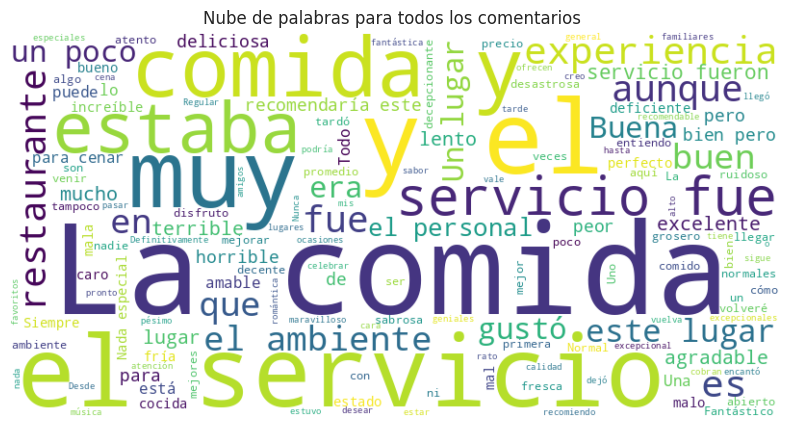

In [32]:
# Concatenamos todos los comentarios en un solo string
all_comments = " ".join(comment for comment in df['Comentario'])

# Generamos la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Quitamos los ejes
plt.title("Nube de palabras para todos los comentarios ")
plt.show()


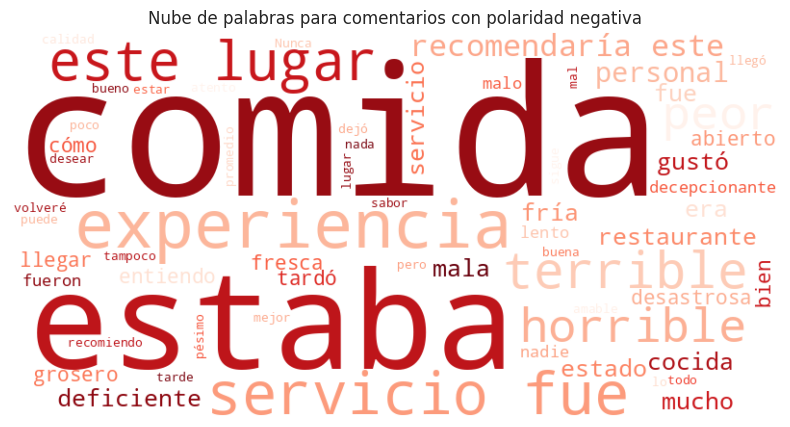

In [28]:
#Nube de palabras solo para los comentarios con polaridad negativa

# Filtrar comentarios con polaridad negativa
negative_comments = df[df['polaridad'] < 0]['Comentario']

# Concatenar todos los comentarios negativos en un solo string
all_negative_comments = " ".join(comment for comment in negative_comments)

# Crear un conjunto de stopwords personalizado en español
stopwords = set(STOPWORDS).union({"el", "la", "los", "las", "de", "y", "a", "que", "en", "por", "con", "es", "un", "una", "para", "muy"})

# Generar la nube de palabras excluyendo las stopwords y con una paleta de colores roja
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, colormap='Reds').generate(all_negative_comments)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Quitamos los ejes
plt.title("Nube de palabras para comentarios con polaridad negativa")
plt.show()

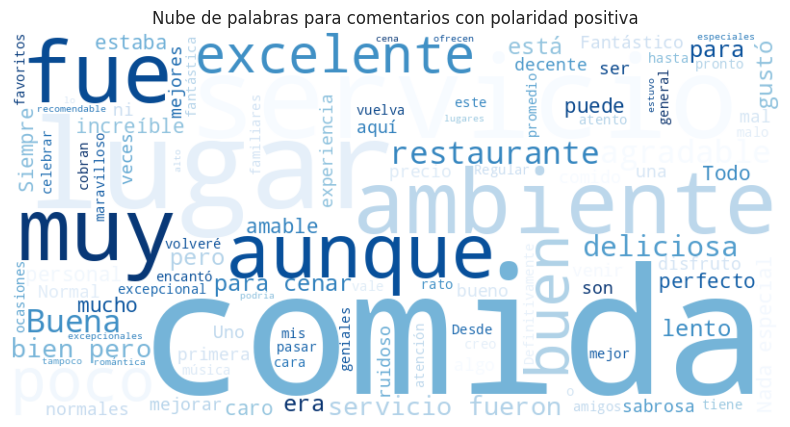

In [31]:
#Comentarios Positivos

# Filtrar comentarios con polaridad positiva
positive_comments = df[df['polaridad'] > 0]['Comentario']

# Concatenar todos los comentarios positivos en un solo string
all_positive_comments = " ".join(comment for comment in positive_comments)

# Crear un conjunto de stopwords personalizado en español
stopwords = set(STOPWORDS).union({"el", "la", "los", "las", "de", "y", "a", "que", "en", "por", "con","un","es"})

# Generar la nube de palabras excluyendo las stopwords y con una paleta de colores azul
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, colormap='Blues').generate(all_positive_comments)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Quitamos los ejes
plt.title("Nube de palabras para comentarios con polaridad positiva")
plt.show()

